## Visualización de los datos con gráficos

In [24]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
sns.set_style("white")

In [25]:
# Load the DataFrame from the CSV file
df = pd.read_csv('../data/results.csv')

# Display the first few rows of the DataFrame
df.head()

,date,home_team,away_team,home_score,away_score,competition,stadium,city,country,neutral,world_cup
0,1871-03-27,Scotland,England,1,0,1871 Scotland v England International,Raeburn Place,Edinburgh,Scotland,False,False
1,1872-02-05,England,Scotland,2,1,1871-72 Home Nations International,The Oval,London,England,False,False
2,1873-03-03,Scotland,England,0,0,1872-73 Home Nations International,West of Scotland F.C.,Glasgow,Scotland,False,False
3,1874-02-23,England,Scotland,1,0,1873-74 Home Nations International,The Oval,London,England,False,False
4,1875-02-15,England,Ireland,2,0,1874-75 Home Nations rugby union matches,The Oval,London,England,False,False


In [26]:
df['outcome'] = df.apply(lambda x : 'H' if x['home_score'] > x['away_score'] 
                                         else ('A' if x['home_score'] < x['away_score'] else 'D'),
                                         axis=1)

df['winning_team'] = df.apply(lambda x : x['home_team'] if x['home_score'] > x['away_score'] 
                                              else (x['away_team'] if x['home_score'] < x['away_score'] else np.nan),
                                              axis=1)

df['losing_team'] = df.apply(lambda x : x['away_team'] if x['home_score'] > x['away_score'] 
                                             else (x['home_team'] if x['home_score'] < x['away_score'] else np.nan),
                                             axis=1)

df['year'] = pd.DatetimeIndex(df['date']).year
df['decade'] = df['year'] - df['year'] % 10

In [27]:
first_match = list(df['home_team'].unique())
first_match.extend(list(df['away_team'].unique()))
first_match_df = pd.DataFrame({'Team': list(set(first_match ))})

first_match_df['First Match Year'] = first_match_df['Team'].apply(lambda x: df[(df['home_team'] == x) | (df['away_team'] == x)].head(1)['year'].values[0])
first_match_df['First Match Decade'] = first_match_df['First Match Year'] - first_match_df['First Match Year'] % 10
first_match_df.sort_values(by='First Match Year', inplace=True)
first_match_df

,Team,First Match Year,First Match Decade
0,England,1871,1870
3,Scotland,1871,1870
6,Ireland,1875,1870
1,Wales,1881,1880
2,Australia,1903,1900
5,New Zealand,1903,1900
8,South Africa,1906,1900
9,France,1906,1900
4,Italy,1937,1930
7,Argentina,1949,1940


Text(1996, 1, 'Rugby profesional')

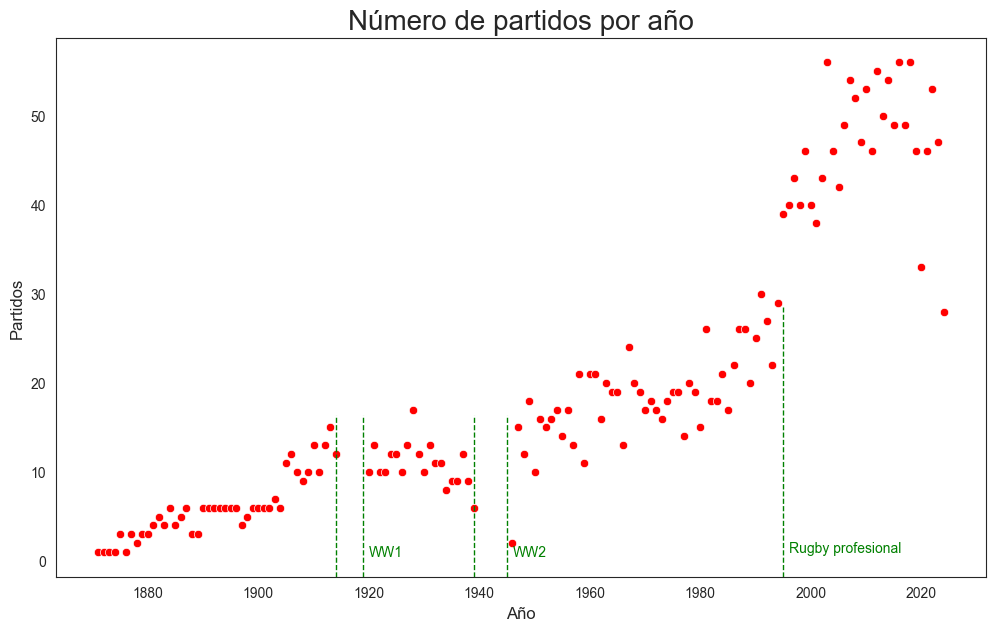

In [28]:
matches_per_year = df['year'].value_counts().sort_index()
#counts the number of matches each year

# Convert matches_per_year to a DataFrame
matches_per_year_df = matches_per_year.reset_index()
matches_per_year_df.columns = ['Year', 'Matches']

plt.figure(figsize=(12,7))

ax = sns.scatterplot(data=matches_per_year_df, x='Year', y='Matches', color='red')
ax.set_title('Número de partidos por año', size=20)
ax.set_xlabel(xlabel='Año', size=12)
ax.set_ylabel(ylabel='Partidos', size=12)

plt.axvline(x = 1914, color = 'g', linestyle = 'dashed', linewidth=1, ymax=0.3)
plt.axvline(x = 1919, color = 'g', linestyle = 'dashed', linewidth=1, ymax=0.3)
plt.text(1920, 0.5, 'WW1', color='green')

plt.axvline(x = 1939, color = 'g', linestyle = 'dashed', linewidth=1, ymax=0.3)
plt.axvline(x = 1945, color = 'g', linestyle = 'dashed', linewidth=1, ymax=0.3)
plt.text(1946, 0.5, 'WW2', color='green')

plt.axvline(x = 1995, color = 'g', linestyle = 'dashed', linewidth=1, ymax=0.5)
plt.text(1996, 1, 'Rugby profesional', color='green')

Text(1996, 1, 'Rugby profesional')

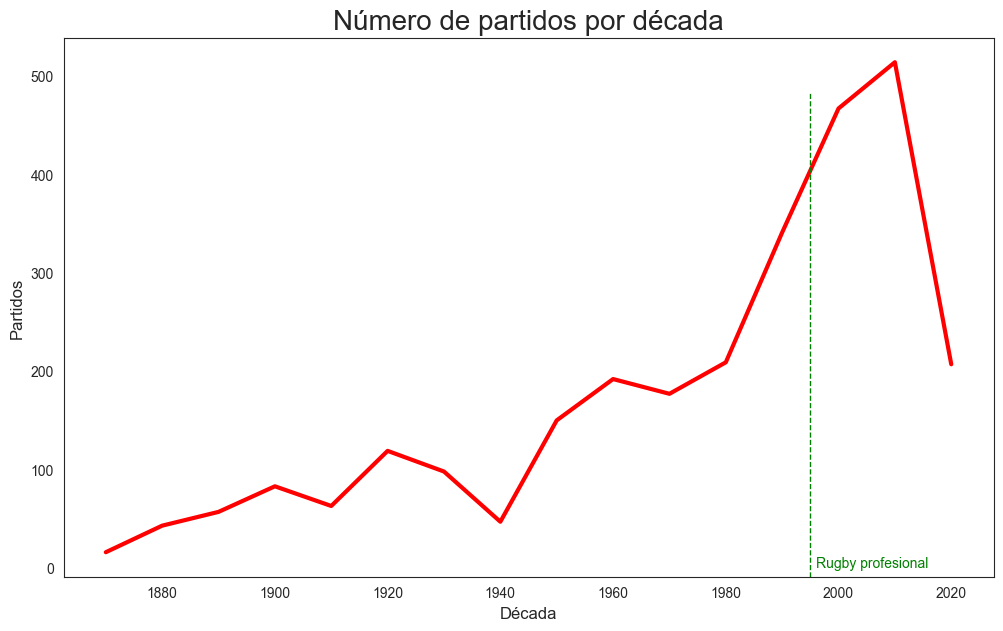

In [29]:
matches_per_decade = df['decade'].value_counts().sort_index()

# Convert matches_per_decade to a DataFrame
matches_per_decade_df = matches_per_decade.reset_index()
matches_per_decade_df.columns = ['Decade', 'Matches']

plt.figure(figsize=(12,7))

ax = sns.lineplot(data=matches_per_decade_df, x='Decade', y='Matches', color='red', linewidth=3)
ax.set_title('Número de partidos por década', size=20)
ax.set_xlabel(xlabel='Década', size=12)
ax.set_ylabel(ylabel='Partidos', size=12)

plt.axvline(x=1995, color='g', linestyle='dashed', linewidth=1, ymax=0.9)
plt.text(1996, 1, 'Rugby profesional', color='green')